In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pathToSave = 'RAPzs/'
pathToTestingMetricF1 = pathToSave+'/testing_dict_instance_f1.json'
pathToTestingDataGTProbs = pathToSave+'/testing_dict_gt_prob_predicted.json'

pathToTrainingMetricF1 = pathToSave+'/training_dict_instance_f1.json'
pathToTrainingDataGTProbs = pathToSave+'/training_dict_gt_prob_predicted.json'

listAttributesRAPv2 = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses','ub-Shirt','ub-Sweater','ub-Vest','ub-TShirt','ub-Cotton','ub-Jacket','ub-SuitUp','ub-Tight','ub-ShortSleeve','ub-Others','lb-LongTrousers','lb-Skirt','lb-ShortSkirt','lb-Dress','lb-Jeans','lb-TightTrousers','shoes-Leather', 'shoes-Sports', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 'shoes-Other','attachment-Backpack','attachment-ShoulderBag','attachment-HandBag','attachment-Box','attachment-PlasticBag','attachment-PaperBag','attachment-HandTrunk','attachment-Other','AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60','Female','BodyFat','BodyNormal','BodyThin','Customer','Employee','action-Calling','action-Talking','action-Gathering','action-Holding','action-Pushing','action-Pulling','action-CarryingByArm','action-CarryingByHand','action-Other']
listAttributesRAPzs = listAttributesRAPv2

listAttributesRAPzs.remove('Age46-60')

columnsDF = ['value F1', 'nameImg']
columnsDF.extend(listAttributesRAPzs)

fileTestingGTPredicted = open(pathToTestingDataGTProbs)
jsonTestingGTPredicted = json.load(fileTestingGTPredicted)

fileTrainingGTPredicted = open(pathToTrainingDataGTProbs)
jsonTrainingGTPredicted = json.load(fileTrainingGTPredicted)

In [4]:
listAttributes = listAttributesRAPzs

In [20]:
columnsDFGT = [item + ' gt' for item in listAttributes]
columnsDFPred= [item + ' prob pred' for item in listAttributes]
columnsDF = columnsDFGT + columnsDFPred

valuesGTTesting = jsonTestingGTPredicted['testing gt']
valuesPredictedTestingOld = jsonTestingGTPredicted['testing prob predicted']

dictTestingGTPredicted = dict.fromkeys(columnsDF)

for column in columnsDFGT:
    dictTestingGTPredicted[column] = [int(vector[columnsDFGT.index(column)]) for vector in valuesGTTesting]

for column in columnsDFPred:
    dictTestingGTPredicted[column] = [vector[columnsDFPred.index(column)] for vector in valuesPredictedTestingOld]

dfTestingRAPzsIdentitites = pd.DataFrame.from_dict(dictTestingGTPredicted, dtype=float)


In [63]:
attributeToAnalyze='BodyFat'

In [64]:
datasetWithAttribute = dfTestingRAPzsIdentitites[(dfTestingRAPzsIdentitites[attributeToAnalyze+' gt']==1)]

In [80]:
npDatasetWithAttribute = datasetWithAttribute['BodyFat prob pred'].to_numpy()
meanDatasetWithAttribute = np.mean(npDatasetWithAttribute, axis=0)

(array([345., 106.,  74.,  42.,  36.,  27.,  39.,  29.,  34.,  34.]),
 array([0.0013083 , 0.10087504, 0.20044179, 0.30000854, 0.39957529,
        0.49914204, 0.59870879, 0.69827553, 0.79784228, 0.89740903,
        0.99697578]),
 <BarContainer object of 10 artists>)

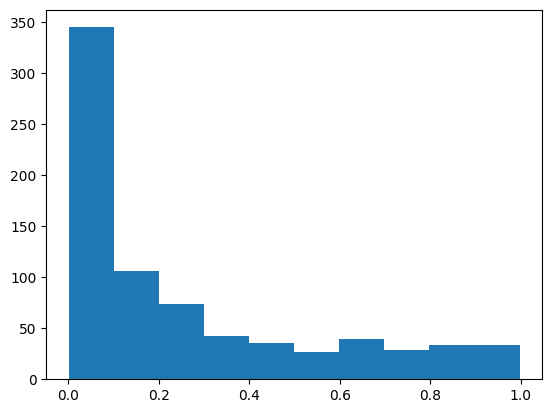

In [83]:
plt.hist(npDatasetWithAttribute)


([<matplotlib.axis.XTick at 0x7f6014c0f7f0>,
 [Text(0, 0, 'hs-BaldHead'),
  Text(1, 0, 'hs-LongHair'),
  Text(2, 0, 'hs-BlackHair'),
  Text(3, 0, 'hs-Hat'),
  Text(4, 0, 'hs-Glasses'),
  Text(5, 0, 'ub-Shirt'),
  Text(6, 0, 'ub-Sweater'),
  Text(7, 0, 'ub-Vest'),
  Text(8, 0, 'ub-TShirt'),
  Text(9, 0, 'ub-Cotton'),
  Text(10, 0, 'ub-Jacket'),
  Text(11, 0, 'ub-SuitUp'),
  Text(12, 0, 'ub-Tight'),
  Text(13, 0, 'ub-ShortSleeve'),
  Text(14, 0, 'ub-Others'),
  Text(15, 0, 'lb-LongTrousers'),
  Text(16, 0, 'lb-Skirt'),
  Text(17, 0, 'lb-ShortSkirt'),
  Text(18, 0, 'lb-Dress'),
  Text(19, 0, 'lb-Jeans'),
  Text(20, 0, 'lb-TightTrousers'),
  Text(21, 0, 'shoes-Leather'),
  Text(22, 0, 'shoes-Sports'),
  Text(23, 0, 'shoes-Boots'),
  Text(24, 0, 'shoes-Cloth'),
  Text(25, 0, 'shoes-Casual'),
  Text(26, 0, 'shoes-Other'),
  Text(27, 0, 'attachment-Backpack'),
  Text(28, 0, 'attachment-ShoulderBag'),
  Text(29, 0, 'attachment-HandBag'),
  Text(30, 0, 'attachment-Box'),
  Text(31, 0, 'attachme

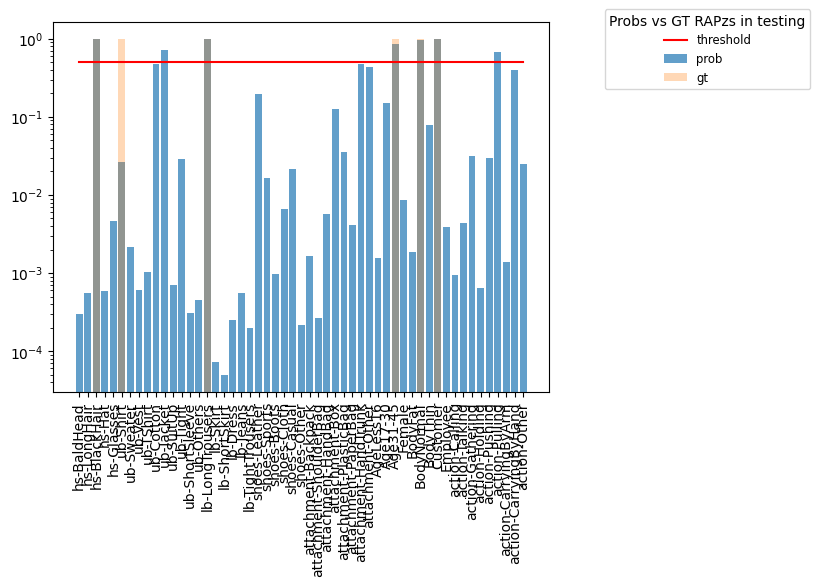

In [61]:
plt.bar(range(0,len(dfTestingRAPzsIdentitites[columnsDFPred].values[0])), dfTestingRAPzsIdentitites[columnsDFPred].values[0], alpha=0.7, label='prob', log=True)
plt.bar(range(0,len(dfTestingRAPzsIdentitites[columnsDFGT].values[0])), dfTestingRAPzsIdentitites[columnsDFGT].values[0], alpha=0.3, label='gt', log=True)
plt.plot(range(0,len(dfTestingRAPzsIdentitites[columnsDFGT].values[0])), [0.5]*len(dfTestingRAPzsIdentitites[columnsDFGT].values[0]), label='threshold', c='red')
tittle='Probs vs GT RAPzs in testing'
plt.legend(bbox_to_anchor=(1.1, 1.05), title=tittle, fontsize='small', fancybox=True)
plt.xticks(range(0,len(listAttributesRAPzs)),listAttributesRAPzs, rotation='vertical')